In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [0]:
def divvy_pop(population, prop):
    '''
    Divide susceptible population into quarantine and non-quarantine
    
    Inputs:
    population: int
    prop: proportion of people who quarantine themselves

    Return: tuple (quarantined, non-quarantined)
    '''

    quarantined = population * prop
    non_quarantined = population - quarantined

    return quarantined, non_quarantined


In [0]:
def visualize_model(init_states, Tmax, beta, gamma, q_prop):
    '''
    Visualize the change in total of susceptibles, infectious, recovered population. 
    A maximum of infectious population will also be identified and returned. 

    init_states: tuple of initial (S, I, R)
    Tmax: the duration of the epidemic
    beta: normal rate of transmission
    gamma: rate of recovery
    q_prop: proportion of people quarantined
    '''
    # Generate variables:
    ## unpack state variables
    S_init, I_init, R_init = init_states 
    N = S_init + I_init + R_init

    # Set up the time array
    dt = 1    # day
    #Niter = int(Tmax/dt) #determine the number of iterations
    time = range(0,Tmax + 1,dt) # preallocate the time array

    # Set up S, I, R arrays
    S = [0] * (Tmax + 1)    # preallocate the solution array
    I = [0] * (Tmax + 1)
    R = [0] * (Tmax + 1)

    # Solve each ODE using Forward Euler
    for i in range(Tmax):
      
      S[0] = S_init
      I[0] = I_init
      R[0] = R_init

      ## dividing S and I into quarantined and non-quarantined:
      Sq, Snq = divvy_pop(S[i], q_prop)
      Iq, Inq = divvy_pop(I[i], q_prop)

      # sample beta from a distribution
      beta_sim = np.random.normal(beta, 0.25)
      beta_less = beta_sim * 0.5

      dSdt = -(beta_less*Sq*Iq + beta_sim*Sq*Inq + beta_less*Snq*Iq + beta_sim*Snq*Inq)/N
      S[i+1] = S[i] + dt*dSdt

      dIdt = (beta_less*Sq*Iq + beta_sim*Sq*Inq + beta_less*Snq*Iq + beta_sim*Snq*Inq)/N - gamma*I[i]
      I[i+1] = I[i] + dt*dIdt

      dRdt = gamma * I[i]
      R[i+1] = R[i] + dt*dRdt

    plt.plot(time, S, 'g', label="S(t)")
    plt.plot(time, I, 'r', label="I(t)")
    plt.plot(time, R, 'b', label="R(t)")
    plt.hlines(41333, 0, Tmax,'y', label="hospital capacity")

    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Effects of " + str(q_prop) + " Quarantine with initial population " + str(init[1]))
    plt.legend()
    plt.show()

    print('Maximum infected = ' + str(max(I)))

In [0]:
def visualize_model_const(init_states, Tmax, beta, gamma, q_prop):
    '''
    Visualize the change in total of susceptibles, infectious, recovered population. 
    A maximum of infectious population will also be identified and returned. 

    init_states: tuple of initial (S, I, R)
    Tmax: the duration of the epidemic
    beta: normal rate of transmission
    gamma: rate of recovery
    q_prop: proportion of people quarantined
    '''
    # Generate variables:
    ## unpack state variables
    S_init, I_init, R_init = init_states 
    N = S_init + I_init + R_init

    # Set up the time array
    dt = 1    # day
    #Niter = int(Tmax/dt) #determine the number of iterations
    time = range(0,Tmax + 1,dt) # preallocate the time array

    # Set up S, I, R arrays
    S = [0] * (Tmax + 1)    # preallocate the solution array
    I = [0] * (Tmax + 1)
    R = [0] * (Tmax + 1)

    # Solve each ODE using Forward Euler
    for i in range(Tmax):
      
      S[0] = S_init
      I[0] = I_init
      R[0] = R_init

      ## dividing S and I into quarantined and non-quarantined:
      Sq, Snq = divvy_pop(S[i], q_prop)
      Iq, Inq = divvy_pop(I[i], q_prop)

      # sample beta from a distribution
      beta_less = beta * 0.5

      dSdt = -(beta_less*Sq*Iq + beta*Sq*Inq + beta_less*Snq*Iq + beta*Snq*Inq)/N
      S[i+1] = S[i] + dt*dSdt

      dIdt = (beta_less*Sq*Iq + beta*Sq*Inq + beta_less*Snq*Iq + beta*Snq*Inq)/N - gamma*I[i]
      I[i+1] = I[i] + dt*dIdt

      dRdt = gamma * I[i]
      R[i+1] = R[i] + dt*dRdt

    plt.plot(time, S, 'g', label="S(t)")
    plt.plot(time, I, 'r', label="I(t)")
    plt.plot(time, R, 'b', label="R(t)")
    plt.hlines(41333, 0, Tmax,'y', label="hospital capacity")

    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Effects of " + str(q_prop) + " Quarantine with initial population " + str(init[1]))
    plt.legend()
    plt.show()

    print('Maximum infected = ' + str(max(I)))

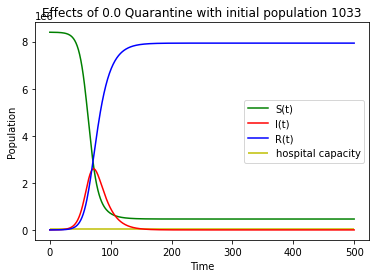

Maximum infected = 2595172.7934919195


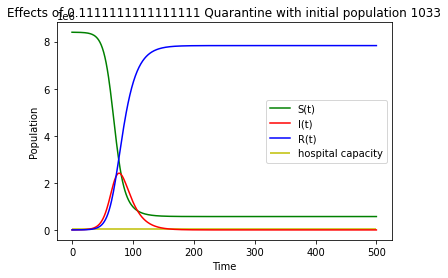

Maximum infected = 2409694.4265479697


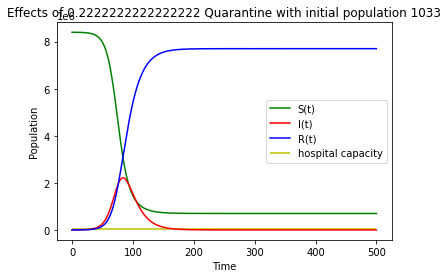

Maximum infected = 2214190.3873053035


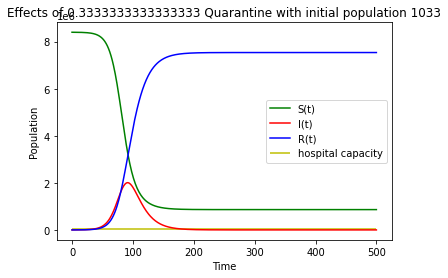

Maximum infected = 2006640.383051286


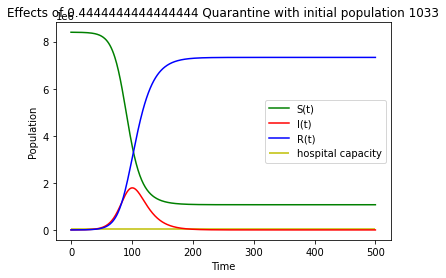

Maximum infected = 1787181.7964043594


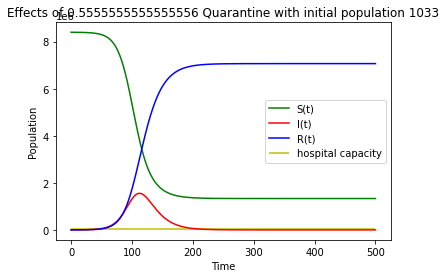

Maximum infected = 1555186.1403928564


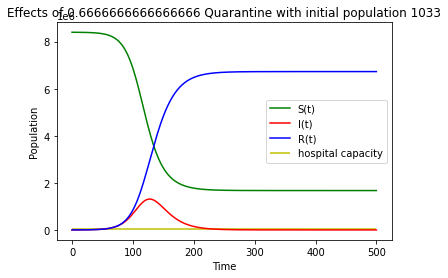

Maximum infected = 1311238.7181628188


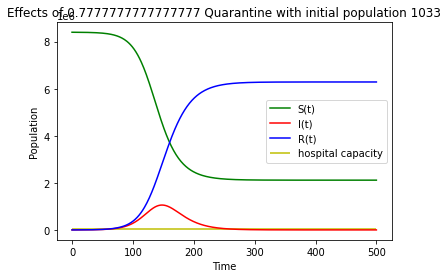

Maximum infected = 1057123.3925479758


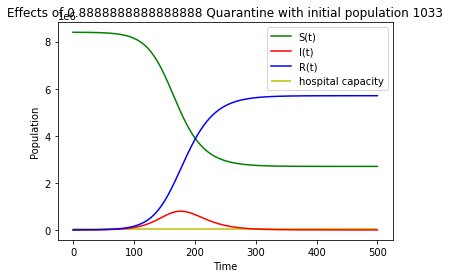

Maximum infected = 795914.1056453008


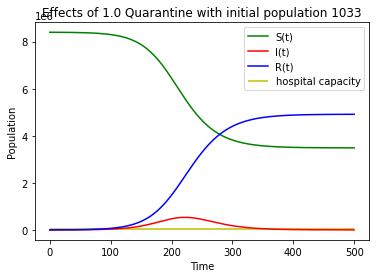

Maximum infected = 535328.8218282182


In [13]:
# NYC
# Varying the proportion of quarantined population with constant beta

# 1033 is the number infected when shelter order was issued
init = (8399000, 1033, 0)

beta = 3/14
sd_b = 0.03

# gamma has normal distribution
gamma = 1/14

# Generate a number of plots with varying quarantined population
props = np.linspace(0, 1, 10)
for q_prop in props:
  visualize_model_const(init, 500, beta, gamma, q_prop)

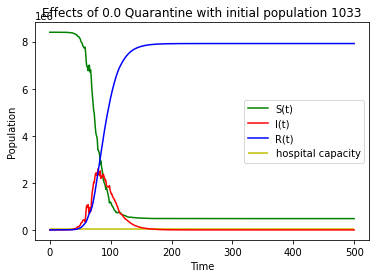

Maximum infected = 2589988.9692551405


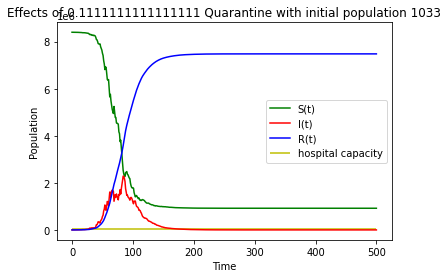

Maximum infected = 2285861.9553671116


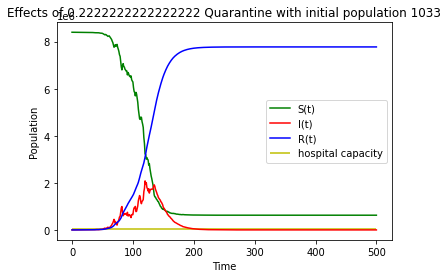

Maximum infected = 2083286.358090461


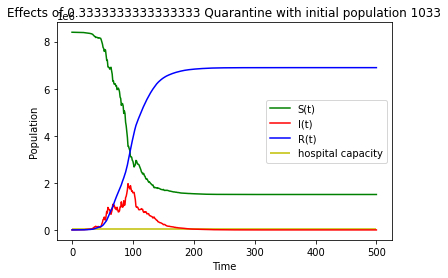

Maximum infected = 1964677.1256393106


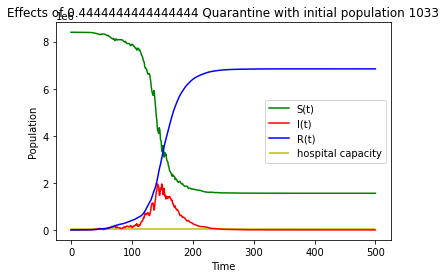

Maximum infected = 1956204.986871511


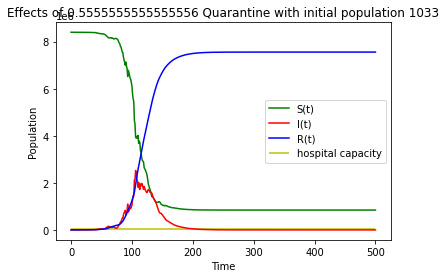

Maximum infected = 2526383.885375398


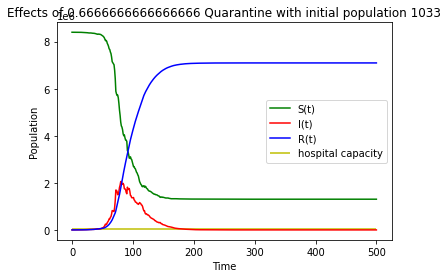

Maximum infected = 2063261.5516800152


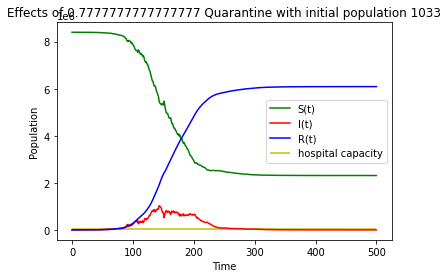

Maximum infected = 1023140.8725889204


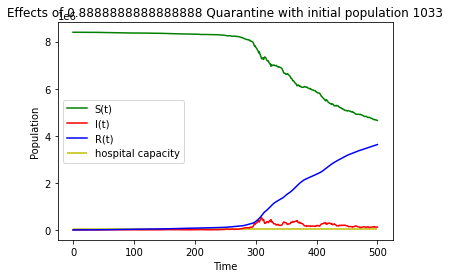

Maximum infected = 520644.0534364674


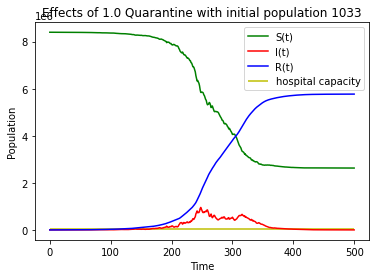

Maximum infected = 954999.7189725142


In [14]:
# NYC
# Varying the proportion of quarantined population

# 1033 is the number infected when shelter order was issued
init = (8399000, 1033, 0)

# beta has normal distribution
# use np.random.normal()
beta = 3/14
sd_b = 0.03

# gamma has normal distribution
gamma = 1/14

# Generate a number of plots with varying quarantined population
props = np.linspace(0, 1, 10)
for q_prop in props:
  visualize_model(init, 500, beta, gamma, q_prop)

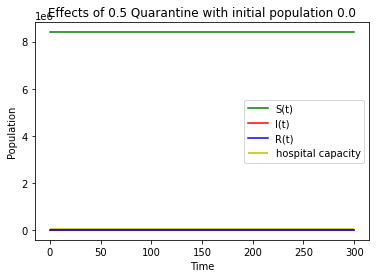

Maximum infected = 0.0


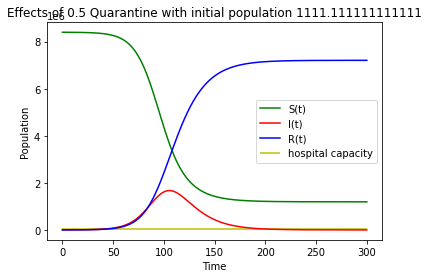

Maximum infected = 1672785.2668738205


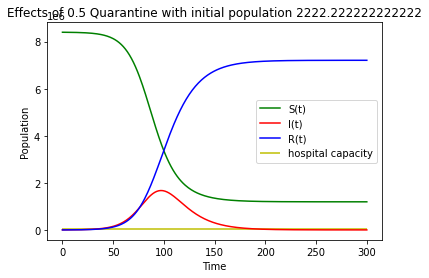

Maximum infected = 1673643.7487170107


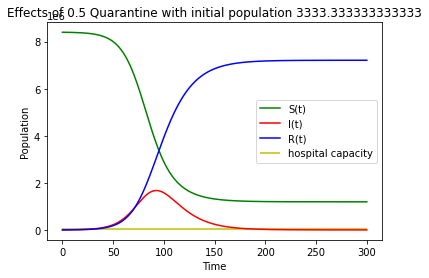

Maximum infected = 1674051.1772632676


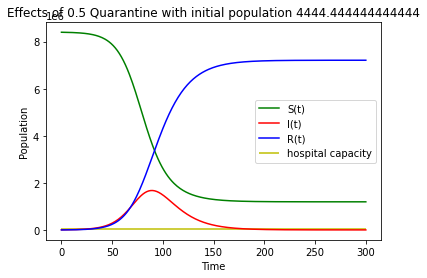

Maximum infected = 1675180.0559334136


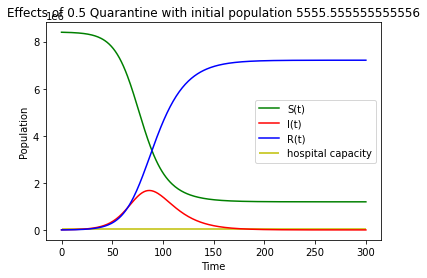

Maximum infected = 1675509.3842045304


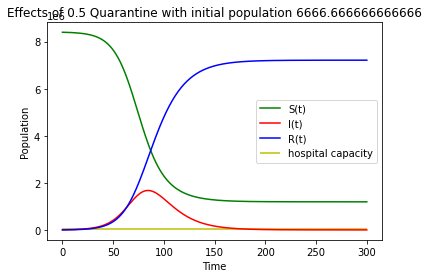

Maximum infected = 1676458.4429920237


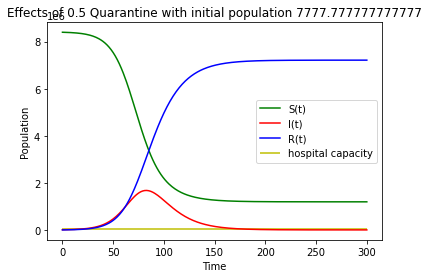

Maximum infected = 1676899.7830458581


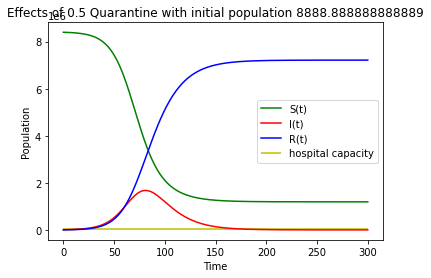

Maximum infected = 1678103.1256203938


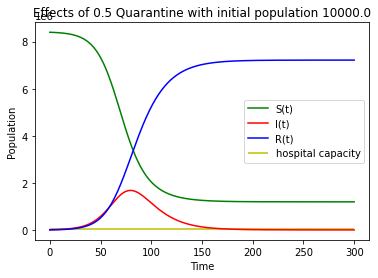

Maximum infected = 1678430.1904820027


In [15]:
# NYC
# Varying the initial infected population with constant beta

# 1033 is the number infected when shelter order was issued
init_pop = np.linspace(0, 10000, 10)
lst_init = []
for pop in init_pop:
  init = (8399000, pop, 0)
  lst_init.append(init)

# parameters:
beta = 3/14
sd_b = 0.03
gamma = 1/14
q_prop = 0.5

# Generate a number of plots with varying quarantined population
for init in lst_init:
  visualize_model_const(init, 300, beta, gamma, q_prop)

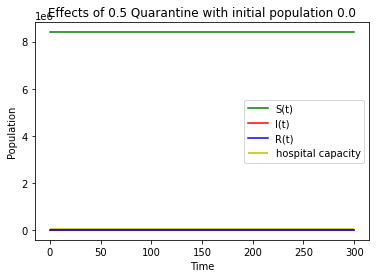

Maximum infected = 0.0


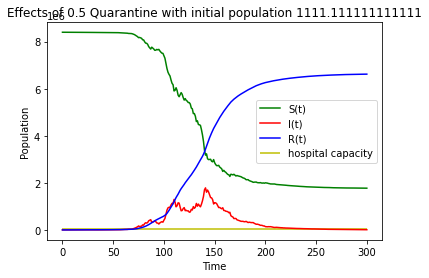

Maximum infected = 1786172.1490331576


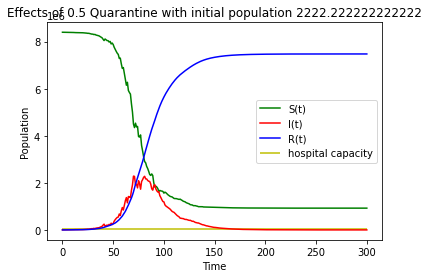

Maximum infected = 2285692.522150329


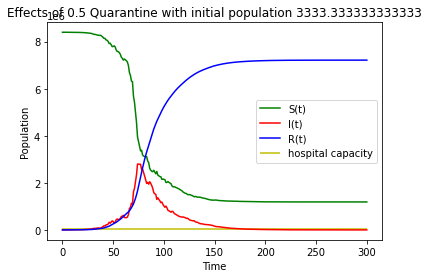

Maximum infected = 2799776.7027034434


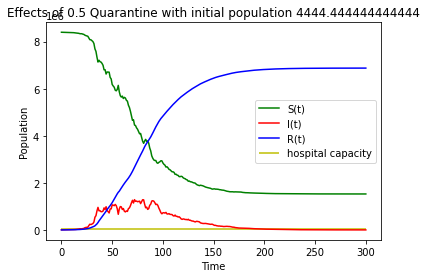

Maximum infected = 1285512.2942831495


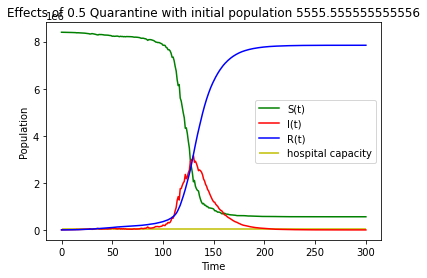

Maximum infected = 3159061.758746908


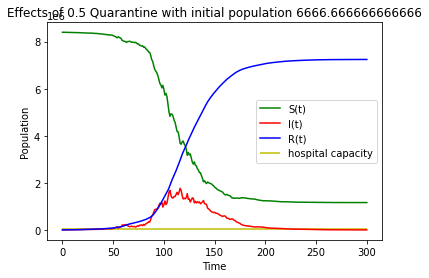

Maximum infected = 1767274.0948332534


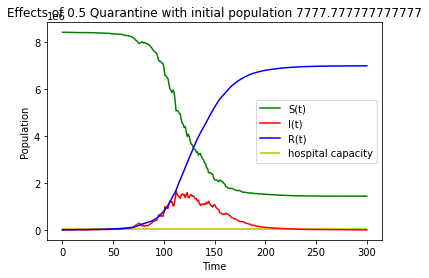

Maximum infected = 1661510.134497852


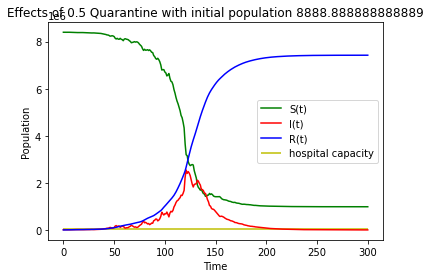

Maximum infected = 2543334.7290756195


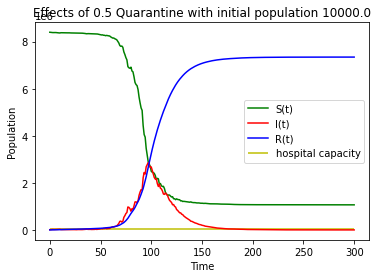

Maximum infected = 2860800.842187888


In [16]:
# NYC
# Varying the initial infected population

# 1033 is the number infected when shelter order was issued
init_pop = np.linspace(0, 10000, 10)
lst_init = []
for pop in init_pop:
  init = (8399000, pop, 0)
  lst_init.append(init)

# parameters:
beta = 3/14
sd_b = 0.03
gamma = 1/14
q_prop = 0.5

# Generate a number of plots with varying quarantined population
for init in lst_init:
  visualize_model(init, 300, beta, gamma, q_prop)